In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# tiger
%cd /content/drive/MyDrive/DS596/project/DS596-Bioinfo-Data/fasta
!ls


[Errno 2] No such file or directory: '/content/drive/MyDrive/DS596/project/DS596-Bioinfo-Data/fasta'
/content/drive/MyDrive/DS596-Bioinfo-Data
 combined_sequences.fasta   fasta  'raw sequencing data'  'Supplementary Files'


In [ ]:
# serena
# serena
%cd /content/drive/MyDrive/DS596-Bioinfo-Data
!ls

/content/drive/MyDrive/DS596-Bioinfo-Data
 combined_sequences.fasta   fasta  'raw sequencing data'  'Supplementary Files'


In [ ]:
# peiyang
%cd /content/drive/MyDrive/DS596-Bioinfo-Data
!ls


/content/drive/MyDrive/DS596-Bioinfo-Data
 combined_sequences.fasta   fasta  'raw sequencing data'  'Supplementary Files'


In [ ]:
# prompt: import libraries for phylogenetic trees

#!pip install biopython
from Bio import Phylo


In [ ]:
path = "/content/drive/MyDrive/DS596-Bioinfo-Data/fasta/"

In [ ]:
!apt-get install -y mafft

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mafft is already the newest version (7.490-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import os
from Bio import SeqIO

# Combine all FASTA files into one
combined_fasta_path = "combined_sequences.fasta"
with open(combined_fasta_path, "w") as combined_file:
    for filename in os.listdir(path):
        if filename.endswith(".fasta") or filename.endswith(".fa"):
            file_path = os.path.join(path, filename)
            with open(file_path, "r") as infile:
                sequences = SeqIO.parse(infile, "fasta")
                SeqIO.write(sequences, combined_file, "fasta")


In [ ]:
from Bio.Align.Applications import MafftCommandline
from Bio import AlignIO

# Align sequences using MAFFT
mafft_cline = MafftCommandline(input=combined_fasta_path)
stdout, stderr = mafft_cline()

# Save the alignment to a file
aligned_fasta_path = "aligned_sequences.fasta"
with open(aligned_fasta_path, "w") as aligned_file:
    aligned_file.write(stdout)

alignment = AlignIO.read(aligned_fasta_path, "fasta")


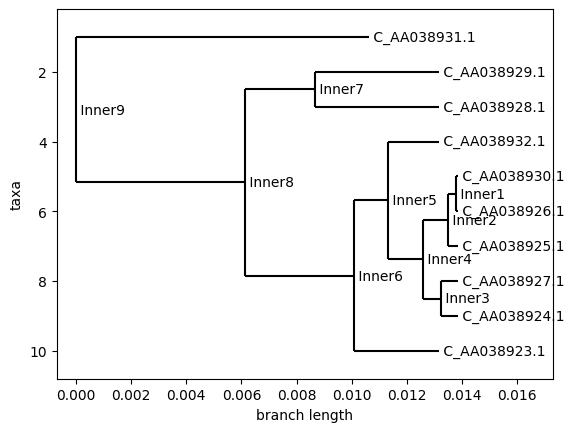

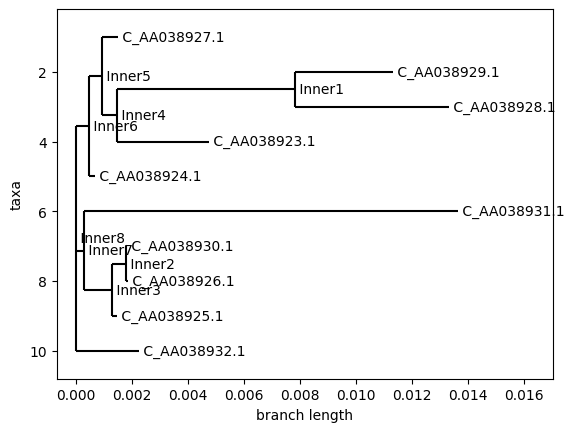

1

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import Bio.Phylo as Phylo

# Create a distance matrix
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)

# Construct UPGMA and NJ trees
constructor = DistanceTreeConstructor()
upgma_tree = constructor.upgma(distance_matrix)
nj_tree = constructor.nj(distance_matrix)

# Draw the trees
Phylo.draw(upgma_tree, do_show=True)
Phylo.draw(nj_tree, do_show=True)

# Save the trees to files
Phylo.write(upgma_tree, "upgma_tree.xml", "phyloxml")
Phylo.write(nj_tree, "nj_tree.xml", "phyloxml")
